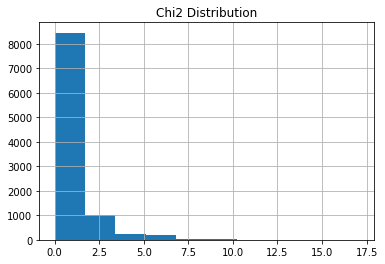

In [3]:
import random as random
import pandas as pd
import matplotlib.pyplot as plt

coin = []
trial = 60
expect = trial / 2
for _ in range(10000):
  coin.append(sum([random.randrange(0,  2) for _ in range(trial)]))
coin = pd.Series(coin)
chi2 = (coin - expect) ** 2 / expect +  ((trial - coin) - expect) ** 2 / expect
chi2.hist()
plt.title('Chi2 Distribution')
plt.show()